# Assignment: Exploratory Data Analysis
### Q1 and Q4
Hanna Svenson

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [1]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt

df = pd.read_csv('./data/college_completion.csv',low_memory=False)

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

There are 3798 rows and 63 columns. This means there are 3798 observations.

In [2]:
print(df.shape)
print()
print(df.head())

(3798, 63)

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...

3. Cross tabulate `control` and `level`. Describe the patterns you see.

The majority of organizations are 4-year and private non-for profit. Of just the two year programs, public are the most common. Overall, there are more 4 year programs than 2, and overall there are more public. 

In [3]:
print(pd.crosstab(df['control'],df['level']),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 



4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


<Axes: xlabel='grad_100_value', ylabel='Count'>

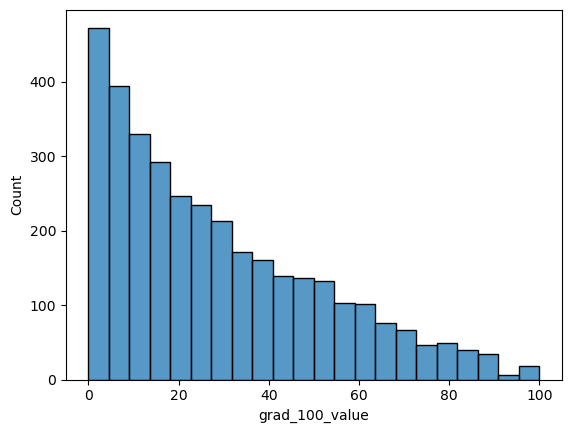

In [4]:
varName = 'grad_100_value'
sns.histplot(df[varName])

<Axes: xlabel='grad_100_value', ylabel='Density'>

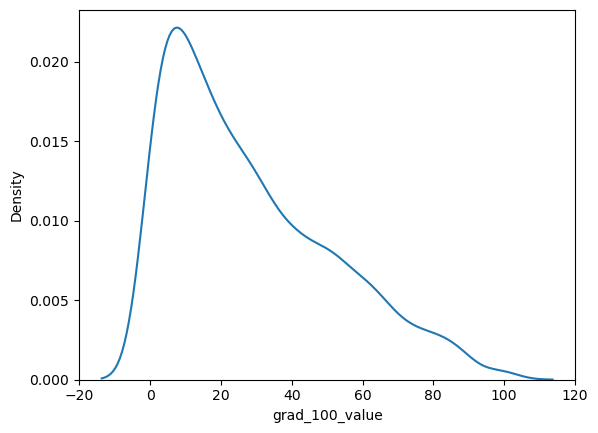

In [5]:
sns.kdeplot(df[varName])

<Axes: >

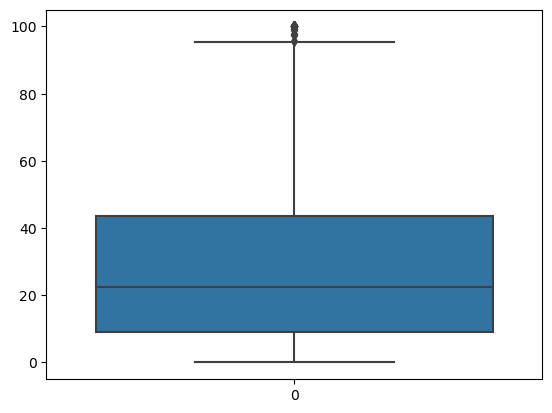

In [6]:
sns.boxplot(df[varName])

In [7]:
df[varName].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

Private not-for-profit institutions have a higher mean and median graduation rate than the other two controls. 
4 year programs have a higher mean and median graduation rate than 2 years.

<Axes: xlabel='grad_100_value', ylabel='Density'>

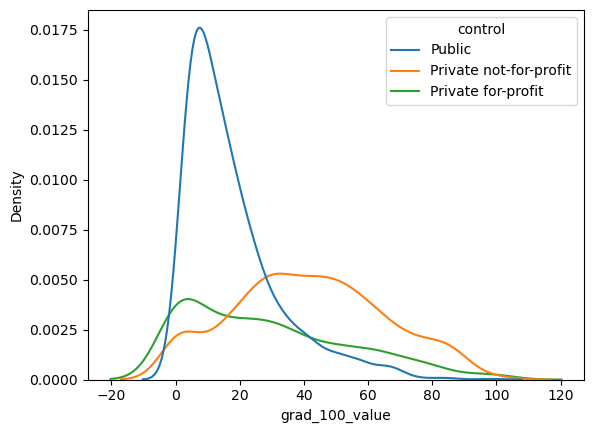

In [8]:
sns.kdeplot(data=df,x=varName,hue='control')
#Public institutions peak higher/sharper and at a lower grad rate than 
#the other two controls

<Axes: xlabel='grad_100_value', ylabel='Density'>

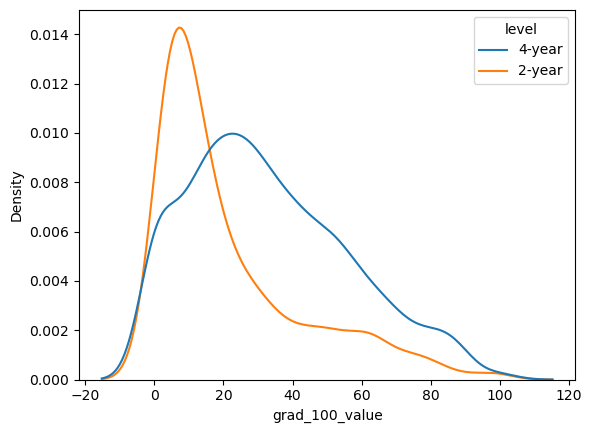

In [9]:
sns.kdeplot(data=df,x=varName,hue='level')
#Two year programs peak at a higher density and lower grad value than four year
#Looking at the right of the graph, 4 year programs have higher densities at higher grad rates

In [10]:
df.groupby('control')[varName].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [11]:
df.groupby('level')[varName].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

Looking at the plot, the best graduation rates would be reflected by the lines who have low densities at low graduation rates and higher densities at higher grad rates. By this metric, 4 year private not for profit looks best, followed by 2 year private for profit. 

<Axes: xlabel='grad_100_value', ylabel='Density'>

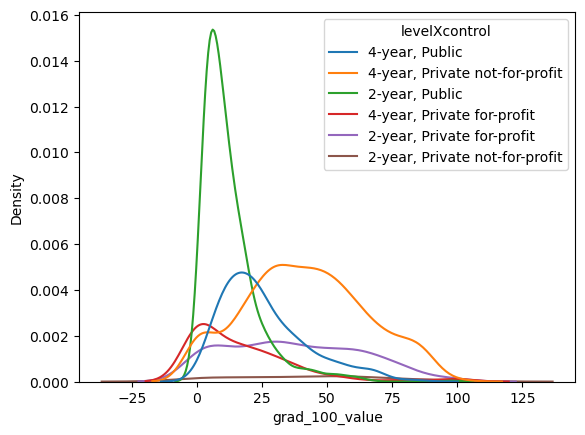

In [12]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

When grouping by level, we see that the aid for 2 year programs is concentrated around $6,000, and has very low levels of aid between about $10-15 thousand, and no aid above that. 4 year programs also peak below $10,000 but still provide some aid worth $10,000 or more. This makes sense, for one, as 4 years of tuition is going to require more than 2 years.

When looking at the graph grouped by control, we see for private not-for-profit institutions peak between $10-20 thousand, and offer aid at higher levels than any other group. Both private and public for-profit peak below $10,000 and do not exceed aid of $20,000. 

<Axes: xlabel='aid_value', ylabel='Density'>

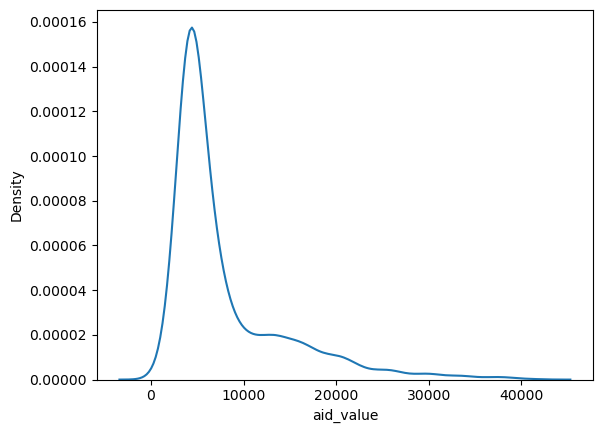

In [13]:
var2='aid_value'
sns.kdeplot(df[var2])

<Axes: xlabel='aid_value', ylabel='Density'>

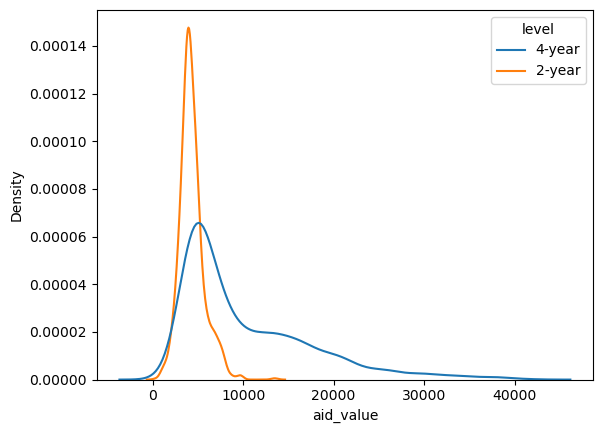

In [14]:
sns.kdeplot(data=df,x=var2,hue='level')

<Axes: xlabel='aid_value', ylabel='Density'>

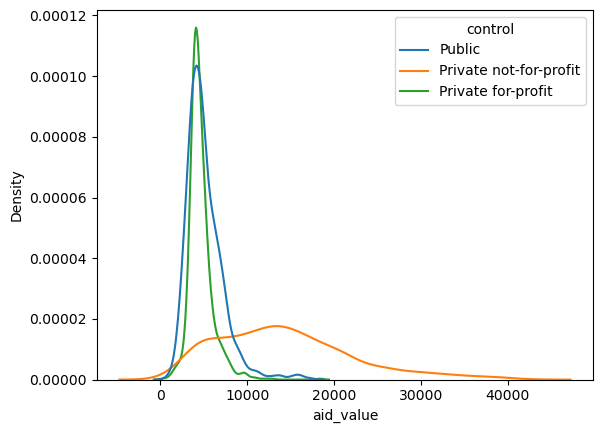

In [15]:
sns.kdeplot(data=df,x=var2,hue='control')

In [16]:
df.groupby('level')[var2].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


In [17]:
df.groupby('control')[var2].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

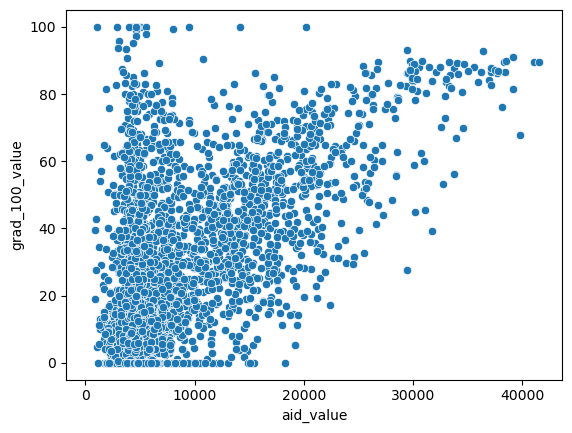

In [18]:
sns.scatterplot(data=df,x='aid_value', y='grad_100_value')

We see a positive relationship between grad value and aid value, but a majority of points concentrated at low aid values and low grad rates. 

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

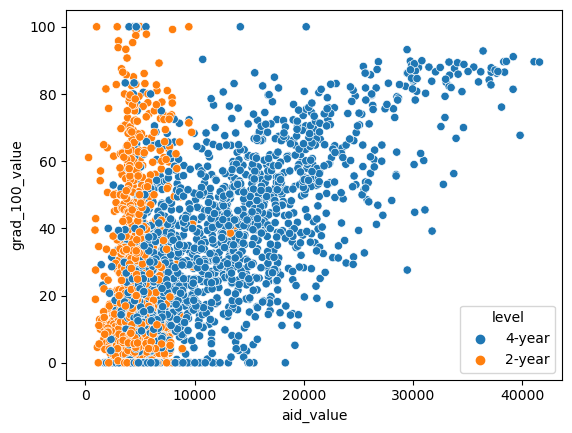

In [19]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

Here we see that the positive relationship between grad value and aid value only really holds true for 4 year programs, while the grad rate does not seem to be affected by aid value. 

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

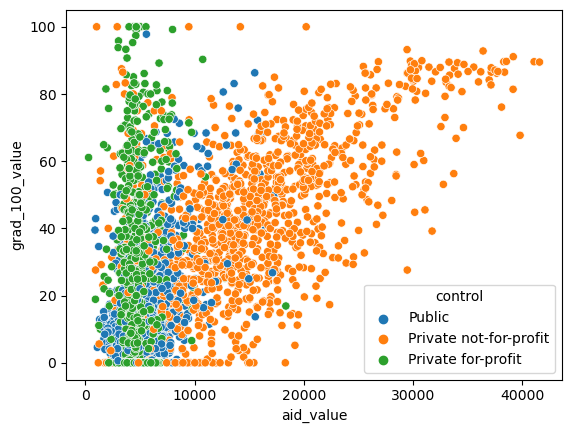

In [20]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

The positive relationship between grad value and aid value holds for private not-for-profit schools, but the other two controls do not vary much by aid. The aid given to the other 2 controls is lower than much of what is given to private not-for-profit. 

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

In [21]:
df2 = pd.read_csv('./data/COVID19HospitalizationTrends.csv',low_memory=False)
df2.head(-5)

,Year,Month,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS,Pct_Dschrg_SNF,Pct_Dschrg_Expired,Pct_Dschrg_Home,Pct_Dschrg_Hspc,Pct_Dschrg_HomeHealth,Pct_Dschrg_Other
0,2020,Overall,National,All,All,All,All,All,All,986590.0,6.251189e+07,1578.2437,10.6626,0.1923,0.1804,0.3410,0.0492,0.1526,0.0609
1,2020,Overall,National,All,All,All,All,All,Rural,189268.0,1.206914e+07,1568.1985,9.7568,0.1742,0.1758,0.3737,0.0391,0.1439,0.0673
2,2020,Overall,National,All,All,All,All,All,Urban,794877.0,4.981956e+07,1595.5118,10.8697,0.1966,0.1814,0.3332,0.0516,0.1548,0.0594
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,8.223233e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,130580.0,8.319817e+06,1569.5056,11.8765,0.1472,0.1198,0.4783,0.0146,0.1301,0.0735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62692,2023,First half,South Dakota,All,All,All,All,All,Unknown,NaN,5.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62693,2023,First half,Tennessee,All,All,All,All,All,Unknown,NaN,9.818000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62694,2023,First half,Texas,All,All,All,All,All,Unknown,NaN,2.992200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62695,2023,First half,Utah,All,All,All,All,All,Unknown,NaN,1.250000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The dictionary states "If a beneficiary’s state of residence is unknown, the beneficiary is assigned to the “Missing Data” category." There is also a Unknown/Other category for race of the beneficiary.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

I am interested in learning how Medicare Covid hospitalizations have changed over time (year, month, year-month), and how they vary by state. 

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?


In [22]:
filtered_df = df2[
    (~df2['Month'].isin(['Overall', 'First half', 'Second half'])) &
    (df2['Bene_Geo_Desc'] != 'National') &
    (df2['Bene_Sex_Desc'] == 'All') &
    (df2['Bene_Race_Desc'] == 'All') &
    (df2['Bene_Mdcd_Mdcr_Enrl_Stus'] == 'All') &
    (df2['Bene_Mdcr_Entlmt_Stus'] == 'All') &
    (df2['Bene_Age_Desc'] == 'All') &
    (df2['Bene_RUCA_Desc'] == 'All')
]
filtered_df.head(10)

,Year,Month,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS,Pct_Dschrg_SNF,Pct_Dschrg_Expired,Pct_Dschrg_Home,Pct_Dschrg_Hspc,Pct_Dschrg_HomeHealth,Pct_Dschrg_Other
3023,2020,1,Alabama,All,All,All,All,All,All,13.0,1052395.0,1.2353,6.3846,0.1538,0.0769,0.6154,0.0000,0.1538,0.0000
3043,2020,1,Alaska,All,All,All,All,All,All,NaN,101922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,2020,1,Arizona,All,All,All,All,All,All,24.0,1349757.0,1.7781,30.0833,0.0417,0.0417,0.5417,0.0833,0.0833,0.0833
3083,2020,1,Arkansas,All,All,All,All,All,All,NaN,643046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,2020,1,California,All,All,All,All,All,All,251.0,6208731.0,4.0427,19.1195,0.2590,0.0717,0.3665,0.0279,0.2112,0.0438
3123,2020,1,Colorado,All,All,All,All,All,All,60.0,915353.0,6.5548,8.2000,0.1667,0.0833,0.5333,0.0167,0.1000,0.0833
3143,2020,1,Connecticut,All,All,All,All,All,All,35.0,684681.0,5.1119,7.7714,0.2000,0.0857,0.3429,0.0857,0.2857,0.0000
3163,2020,1,Delaware,All,All,All,All,All,All,NaN,213136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3183,2020,1,District Of Columbia,All,All,All,All,All,All,NaN,92467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3203,2020,1,Florida,All,All,All,All,All,All,184.0,4639283.0,3.9661,10.4837,0.1413,0.0380,0.5272,0.0435,0.1848,0.0326


In [23]:
filtered_df = filtered_df.copy()
filtered_df['YearMonth'] = filtered_df['Year'].astype(str) + '.' + filtered_df['Month']
filtered_df.head()

,Year,Month,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Total_Hosp_Per100K,Avg_LOS,Pct_Dschrg_SNF,Pct_Dschrg_Expired,Pct_Dschrg_Home,Pct_Dschrg_Hspc,Pct_Dschrg_HomeHealth,Pct_Dschrg_Other,YearMonth
3023,2020,1,Alabama,All,All,All,All,All,All,13.0,1052395.0,1.2353,6.3846,0.1538,0.0769,0.6154,0.0000,0.1538,0.0000,2020.1
3043,2020,1,Alaska,All,All,All,All,All,All,NaN,101922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.1
3063,2020,1,Arizona,All,All,All,All,All,All,24.0,1349757.0,1.7781,30.0833,0.0417,0.0417,0.5417,0.0833,0.0833,0.0833,2020.1
3083,2020,1,Arkansas,All,All,All,All,All,All,NaN,643046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.1
3103,2020,1,California,All,All,All,All,All,All,251.0,6208731.0,4.0427,19.1195,0.2590,0.0717,0.3665,0.0279,0.2112,0.0438,2020.1


<Axes: xlabel='Year', ylabel='Total_Hosp_Per100K'>

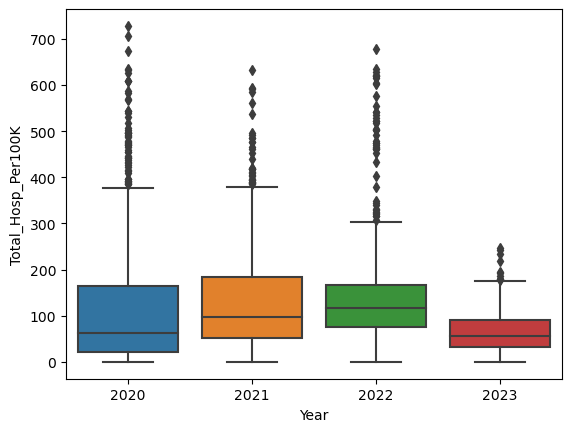

In [24]:
sns.boxplot(data=filtered_df, x='Year', y="Total_Hosp_Per100K") # Same thing, but horizontal

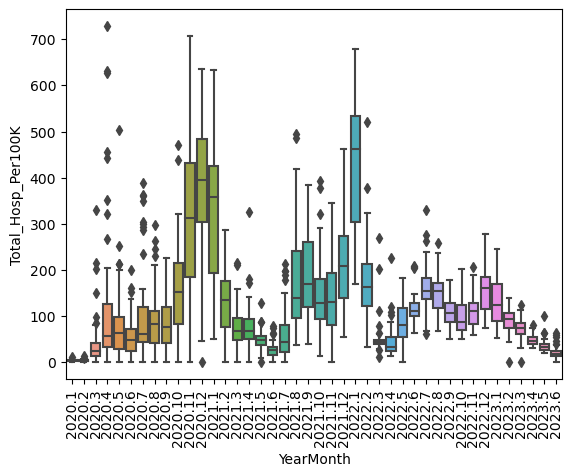

In [25]:
sns.boxplot(data=filtered_df, x='YearMonth', y="Total_Hosp_Per100K") 
plt.xticks(rotation=90)
plt.show()

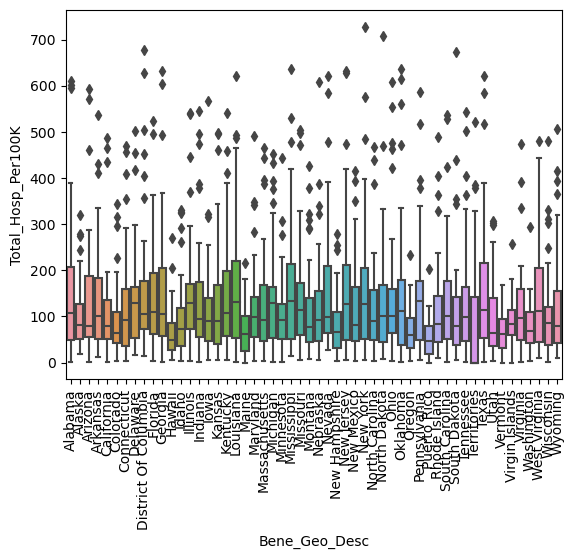

In [26]:
sns.boxplot(data=filtered_df, x='Bene_Geo_Desc', y="Total_Hosp_Per100K")
plt.xticks(rotation=90)
plt.show()

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
This kd plot shows hospitalizations per 100K, and how they have changed by year. 
An interesting observation is that the peaks for 2020 and 2023 happen at similar values, and that 2022 has a peak at a higher x value than 2021. The values show data well without needing to be rescales, because the data is scaled on its own by measuring per 100K.


<Axes: xlabel='Total_Hosp_Per100K', ylabel='Density'>

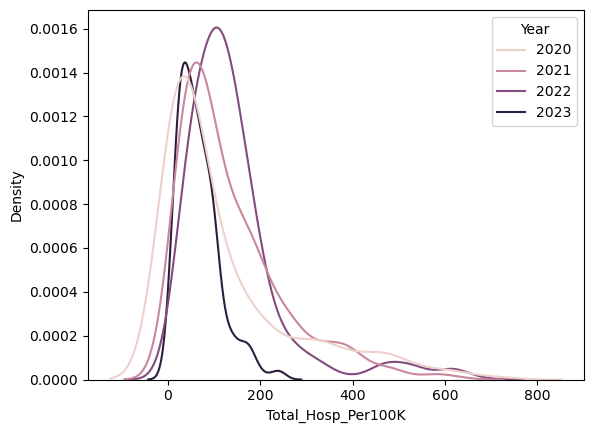

In [27]:
sns.kdeplot(data=filtered_df, x='Total_Hosp_Per100K', hue ='Year')
# sns.kdeplot(data=df,x=var2,hue='control')

6. Create a scatter plot, and describe the relationship you see.

In this plot, you see the points with the highest average length of stay occurred in 2020, which makes sense as this was before vaccines were made available so symptoms were more severe, and hospitals may have been underprepared with how to treat patients as this was early on in the pandemic. 

Most points on this graph are concentrated in the lower end of both variables, without enough of a pattern to claim a clear positive or negative relationship between the variables. 

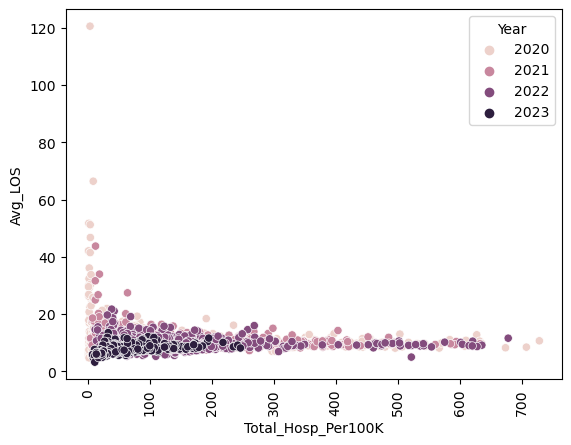

In [28]:
sns.scatterplot(data=filtered_df,x='Total_Hosp_Per100K', y='Avg_LOS', hue="Year")
plt.xticks(rotation=90)
plt.show()

7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

Here it is interesting to see how Medicare Covid hospitalizations per 100K vary by state. It is interesting to see how states like Vermont, Maine, and Hawaii had low numbers for mean hospitalizations per 100K.

The only geographic regions to have a mean of more than 150 hospitalizations per 100K were Alabama, DC, Georgia, Kentucky, Louisiana, Mississippi, Nevada, New Jersey, New York, Ohio, Oklahoma, and Texas. Interestingly, all of these states except for Nevada form a path stretching along the south of the US along the south-east to a bit up the eastern coast. I wonder why this region had so many hospitalizations in particular, and why Nevada was also particularly affected. 

In [29]:
filtered_df.groupby('Bene_Geo_Desc')['Total_Hosp_Per100K'].describe()

,count,mean,std,min,25%,50%,75%,max
Bene_Geo_Desc,,,,,,,,
Alabama,42.0,158.245479,156.696139,1.2353,49.821625,107.66800,207.229750,609.8631
Alaska,37.0,105.242043,78.737591,17.4574,51.706800,80.69670,127.748400,320.7691
Arizona,42.0,139.831943,137.300255,1.7781,56.069200,79.05585,188.639700,591.8261
Arkansas,40.0,140.947955,122.756781,11.8019,51.814900,101.35315,183.503425,536.0375
California,42.0,110.312414,110.418186,2.1226,50.117375,78.51665,135.127175,487.5922
Colorado,42.0,91.476210,81.603567,4.0343,42.978575,64.14845,110.168650,344.5264
Connecticut,42.0,129.243814,121.829455,3.6465,36.708550,92.25265,158.701650,470.3480
Delaware,40.0,138.094622,111.961442,16.1361,53.941600,129.93320,163.538625,501.7577
District Of Columbia,40.0,164.660530,161.760466,15.0690,72.867550,105.68370,176.301850,677.9260
